# Homework 3

Leonardo Masci, Jeremy Sapienza, Antonio Zappia

The aim of this homework is to create a search engine that returns some book suggestions, given an input from the user in the form of words. To achieve this, we first scraped the website Goodreads.com, in its "best books ever" section, to get a dataset of 30,000 books. Once we had our dataset, we created increasingly better search algorithms to get to a satisfying result.

Next, we analyzed the top 10 book series of our dataset to see the course of their total pages throughout the single books of each series.

Finally, in the last exercise we faced a recursive algorithm and its running time.

In [ ]:
import functions as fun
import json

## 1) Data Collection

Since no dataset was provided for this homework, we had to create our own dataset by scraping the given website, which was done in the following steps.

### 1.1 Get the list of books

Firstly, we had to get the list of all the books we wanted to add to our dataset. This included all the books found in the first 300 pages of the "best books ever" section.
Therefore, we created a function that scrapes a certain number of pages from an initial url, to extract the url of each of them. The initial url and the following number of pages are given as input, while the resulting urls are stored in a txt file called "urlpages.txt" .

In [23]:
fun.get_urls("https://www.goodreads.com/list/show/1.Best_Books_Ever?page=", 300)

### 1.2 Crawl books

Once we had our txt file containing all the urls, we created a second function that downloads the html of each given url. These htmls are collected in different folders, depending on the corresponding page. Moreover, we added a try and except to be sure that all requests that we could lose will be re-scrape in a second moment.

In [24]:
fun.crawl_urls(300, "urlpages.txt")

### 1.3 Parse downloaded pages

Finally, after completing this step, we went on to actually parse the given html articles. We will obtain for each html article its article_i.tsv.

In [ ]:
fun.get_scraping("html_pages")

### Creating and concatening the final dataset for our purposes

Since running the above mentioned functions took a long time, the three of us split the work among us. So in the end we run another function that returned our distinct outputs as tsv files and combined those three to create the final dataset we will be working with.

In [ ]:
fun.finaldataset_tsv("html_pages")

## 2) Search Engine

Now that we have our dataset, we can start working on the search engines we are interested in, starting with a very simple search engine and work our way towards a more complex one.

In [2]:
df = fun.openCSV("finaloutput.csv")

In [3]:
df.head()

,bookTitle,bookSeries,bookAuthors,ratingValue,ratingCount,reviewCount,Plot,NumberofPages,Published,Characters,Setting,Url
0,The Hunger Games,(The Hunger Games #1),Suzanne Collins,4.33,6413302,172615,"Could you survive on your own in the wild, wit...",374,September 14th 2008,"Katniss Everdeen, Peeta Mellark, Cato (Hunger ...","District 12, Panem, Capitol, Panem, Panem",https://www.goodreads.com/book/show/2767052-th...
1,Harry Potter and the Order of the Phoenix,(Harry Potter #5),J.K. Rowling,4.50,2527001,42768,There is a door at the end of a silent corrido...,870,September 2004 by,"Sirius Black, Draco Malfoy, Ron Weasley, Petun...","Hogwarts School of Witchcraft and Wizardry, Lo...",https://www.goodreads.com/book/show/2.Harry_Po...
2,To Kill a Mockingbird,(To Kill a Mockingbird),Harper Lee,4.28,4530963,91866,The unforgettable novel of a childhood in a sl...,324,May 23rd 2006,"Scout Finch, Atticus Finch, Jem Finch, Arthur ...","Maycomb, Alabama",https://www.goodreads.com/book/show/2657.To_Ki...
3,Pride and Prejudice,,Jane Austen,4.26,3020392,67869,Alternate cover edition of ISBN 9780679783268S...,279,October 10th 2000,"Mr. Bennet, Mrs. Bennet, Jane Bennet, Elizabet...","United Kingdom, Derbyshire, England, England, ...",https://www.goodreads.com/book/show/1885.Pride...
4,Twilight,(The Twilight Saga #1),Stephenie Meyer,3.60,4993492,104954,About three things I was absolutely positive.F...,501,September 6th 2006,"Edward Cullen, Jacob Black, Laurent, Renee, Be...","Forks, Washington, Phoenix, Arizona, Washingto...",https://www.goodreads.com/book/show/41865.Twil...


### Cleaning data and creating the index

Before we can proceed with the search engines, we need to clean the dataset we have obtained and create a vocabulary. 

The clean data is needed to apply the search engine, as the input words may not match the ones in our file if processed raw. For this reason, we remove stopwords (such as 'a', 'the', etc.) and punctuation, which do not constitute valuable information about the text, and then we apply stemming. This way, we are left with only the root of words, which will make matching in the coming functions that much easier. These are some of the methods in the Bag-of-words model, which has the ultimate goal of creating a vocabulary of all the unique words found in a given text.

That is why we defined a copy of the original dataset as the clean version of the dataset itself. This way we can create the needed vocabulary, which will be based on the 'Plot' column.

In [4]:
df1 = df.copy()

In [5]:
df1['Plot'] = df1.Plot.apply(lambda x: fun.clean_text(x))

### 2.1. Conjunctive query

#### 2.1.1) Create your index!

Having cleaned the dataset's Plot column with the Bag-of-words model, we now create the vocabulary for the whole dataset, which contains all of the documents. This vocabulary will contain all the tokens of the dataset as keys and for each token the list of documents that token is found in.

In [6]:
vocabulary = fun.create_vocabulary(df1)

We then save it, to avoid having to calculate the data structure every time. For this reason, we create and open the json file containing the vocabulary.

In [7]:
a_file = open("vocabulary.json", "w")
a_file = json.dump(vocabulary, a_file)

In [8]:
a_file = open("vocabulary.json", "r")
vocabulary = json.load(a_file)

Consequently, we define an inverted list, which will contain the keys of the vocabulary as keys with the difference that they will no longer be in the form of tokens but as a number (the index). This way, each key contains a list of values corresponding to the documents where that specific token is present.

In [9]:
inv_lst = fun.create_inverted_list(vocabulary)

#### 2.1.2) Execute the query

We are now ready to receive the user's input, which is then processed the same way as the dataset was so that the matching with the vocabulary tokens will be possible.

In [11]:
query = input("Insert your query string: ")

Insert your query string: Survival games


In [12]:
cleanQString = fun.cleanQuery(query)

In [13]:
cleanQString

['surviv', 'game']

Finally we made our new dataset containing three columns BookTitle, Plot and Url. Before creating the dataset we defined a list containing all the documents containing the words in the clean query we have given as input. This work is done by taking the term ids in the inverted list and the term ids associated with the clean query. Once we have obtained the intersection list, we append each of its rows in the new dataset containing plot, booktitle, and url of the document in which the word of the clean query is present.

In [24]:
new_dataset = fun.search_engine1(cleanQString, vocabulary, df, inv_lst).head(10)

In [25]:
new_dataset

,bookTitle,Plot,Url
0,The Hunger Games,"Could you survive on your own in the wild, wit...",https://www.goodreads.com/book/show/2767052-th...
1,A Life Once Lived,Waverly Jones is always game to try something ...,https://www.goodreads.com/book/show/36463950-a...
2,The Gender Game,For fans of The Hunger Games and Divergent com...,https://www.goodreads.com/book/show/31131467-t...
3,Silence is Golden,Silent. Cold. Chiselled perfection. That is Ri...,https://www.goodreads.com/book/show/31367949-s...
4,Akarnae,"With just one step, sixteen-year-old Alexandra...",https://www.goodreads.com/book/show/23569787-a...
5,In the Dark,A secluded mountain lodge. The perfect getaway...,https://www.goodreads.com/book/show/44527037-i...
6,Forbidden Blood,In a dark world where vampires exist and where...,https://www.goodreads.com/book/show/10992270-f...
7,Hunter's Run,"Like so many others, Ramon Espejo ran from the...",https://www.goodreads.com/book/show/1282266.Hu...
8,Fire & Blood,With all the fire and fury fans have come to e...,https://www.goodreads.com/book/show/39943621-f...
9,Red Sparrow,In the grand spy-tale tradition of John le Car...,https://www.goodreads.com/book/show/15803037-r...


### 2.2 Conjunctive query & Ranking score

#### 2.2.1) Inverted index

In the second part of the exercise we use the clean dataset obtained in the beginning and the vocabulary we just created.

We start with updating the inverted list, which this time will associate a list of tuples to each term_id (that is, the numeric value associated to the keys present in the vocabulary). Each tuple contains the document in which that term is present and the tf_idf value for that term_id in that document.

There are different steps required to get the tf_idf value. Firstly, we get the term frequency by simply counting the amount of times each term appears in each document. Next, we calculate the idf (inverse document frequency) as a way to give priority to those terms which are found less commonly in the document set. As the name suggests, this is an inverse frequency. Finally, we combine the two in the tf_idf, which is nothing more than their product.

In [16]:
inv_lst2 = fun.inverted_list_2(vocabulary, df1)

#### 2.2.2) Execute the query

Next, we make a list of dictionaries. Each dictionary is associated with the i-th row of the clean dataset. Each dictionary contains as keys the tokens within the plot of the i-th row and as values for each key the tf_idf.

In [17]:
documents = fun.create_documents_list(df1, inv_lst2, vocabulary)

We then define a score through the cosine similarity. In particular, for each document belonging to the document_list we calculate the cosine similarity between the clean query put in input and the i-th document in the document list. The cosine similarity can be zero or a specific value. It is always different from zero if at least one clean query token is present from the i-th document. Once the cosine similarity is applied, we return a list containing for each document the cosine similarity with respect to the clean query.

In [18]:
top_k_documents = fun.similarity_score(df1, inv_lst2, vocabulary, cleanQString, documents)

Finally we apply the heapq algorithm to show the top 10 documents, sorted in ascending order of the cosine similarity.

In [19]:
show_top_k_documents = fun.heap_k_documents(top_k_documents, 10)

We can now run the second search engine, which is an improved version of the previous one as it takes into consideration not only the number of words in the query that are found in the plots, but also how often those words are mentioned. This makes the search engine more accurate in identifying books that are relevant given a certain query, which is in line with our final goals.

The final dataset obtained with our second search engine is found below.

In [21]:
new_df = fun.dataset_search_engine2(show_top_k_documents, df)

In [22]:
new_df

,bookTitle,Plot,Url,Similarity
0,"Halo: The Fall of Reach, The Flood, First Strike","""The official novels of the award-winning Xbox...",https://www.goodreads.com/book/show/136179.Halo,0.27
1,Devil's Own,"After surviving slavery, Aiden MacAlpin has no...",https://www.goodreads.com/book/show/8705483-de...,0.21
2,The Most Dangerous Game,The Most Dangerous Game features a big-game hu...,https://www.goodreads.com/book/show/157076.The...,0.21
3,The Forbidden Game,"When Jenny buys a game for her boyfriend, Tom,...",https://www.goodreads.com/book/show/7100490-th...,0.19
4,Homestuck,It's a story about some kids who are friends o...,https://www.goodreads.com/book/show/20869872-h...,0.18
5,The Micro Kids: An 80s Adventure with ZX Spect...,\nIt is November 1983 and young Billy Twist an...,https://www.goodreads.com/book/show/43672614-t...,0.16
6,Nerve,ARE YOU PLAYING THE GAME OR IS THE GAME PLAYIN...,https://www.goodreads.com/book/show/13088498-n...,0.16
7,The Last Man Alive,The adventures of a group who survived a poiso...,https://www.goodreads.com/book/show/888947.The...,0.15
8,In a Pit with a Lion on a Snowy Day: How to Su...,In a Pit with a Lion on a Snowy Day: How to Su...,https://www.goodreads.com/book/show/114316.In_...,0.15
9,"Yu-Gi-Oh!, Vol. 1: The Millenium Puzzle",10th grader Yugi spent most of his time alone ...,https://www.goodreads.com/book/show/828140.Yu_...,0.15


## 3) Define a new score

We now want to further improve our search engine, this time by taking into account multiple variables.

Firstly, we chose to expand the similarity score to take into account also the book title and name of the author. This will ensure finding more relevant results.

We also defined a second score, that measures the "popularity" of a book by taking in consideration how many ratings a book has and what is it's rating value. This way, books that have been read by more users or are more appreciated by readers are shown before books that, although they may have a higher similarity score based on the query, are more obscure reads.

As usual, we firstly look at the dataset we will be working with.

In [3]:
df.head()

,bookTitle,bookSeries,bookAuthors,ratingValue,ratingCount,reviewCount,Plot,NumberofPages,Published,Characters,Setting,Url
0,The Hunger Games,(The Hunger Games #1),Suzanne Collins,4.33,6413302,172615,"Could you survive on your own in the wild, wit...",374,September 14th 2008,"Katniss Everdeen, Peeta Mellark, Cato (Hunger ...","District 12, Panem, Capitol, Panem, Panem",https://www.goodreads.com/book/show/2767052-th...
1,Harry Potter and the Order of the Phoenix,(Harry Potter #5),J.K. Rowling,4.50,2527001,42768,There is a door at the end of a silent corrido...,870,September 2004 by,"Sirius Black, Draco Malfoy, Ron Weasley, Petun...","Hogwarts School of Witchcraft and Wizardry, Lo...",https://www.goodreads.com/book/show/2.Harry_Po...
2,To Kill a Mockingbird,(To Kill a Mockingbird),Harper Lee,4.28,4530963,91866,The unforgettable novel of a childhood in a sl...,324,May 23rd 2006,"Scout Finch, Atticus Finch, Jem Finch, Arthur ...","Maycomb, Alabama",https://www.goodreads.com/book/show/2657.To_Ki...
3,Pride and Prejudice,,Jane Austen,4.26,3020392,67869,Alternate cover edition of ISBN 9780679783268S...,279,October 10th 2000,"Mr. Bennet, Mrs. Bennet, Jane Bennet, Elizabet...","United Kingdom, Derbyshire, England, England, ...",https://www.goodreads.com/book/show/1885.Pride...
4,Twilight,(The Twilight Saga #1),Stephenie Meyer,3.60,4993492,104954,About three things I was absolutely positive.F...,501,September 6th 2006,"Edward Cullen, Jacob Black, Laurent, Renee, Be...","Forks, Washington, Phoenix, Arizona, Washingto...",https://www.goodreads.com/book/show/41865.Twil...


We then proceed to create a copy of this main dataset, to avoid modifing the original information.

In [4]:
df1 = df.copy()

Next, to create our new score based on bookTitle, bookAuthors and Plot, we tokenize their values and initialize the new vocabulary based on those three columns.

In [5]:
df1 = fun.cleaning_value_columns(df1)
vocabulary2 = fun.create_newVocabulary(df1)

We chose to save the dictionary as a json file, because its the structure behaves similarly to a dictionary used in python. Therefore, we create and then open this json file.

In [6]:
a_file = open("vocabulary2.json", "w")
a_file = json.dump(vocabulary2, a_file)
a_file = open("vocabulary2.json", "r")
vocabulary2 = json.load(a_file)

### 3.1 New search engine - step 1

We are now ready to receive the user's input, which is again processed to make matching with the clean dataset possible.

In [7]:
query = input("Insert your query string: ")

Insert your query string: survival games


In [8]:
cleanQString = fun.cleanQuery(query)
cleanQString

['surviv', 'game']

Afterwards, we create the inverted list using the dictionary and execute the new search engine based on the three columns.

In [15]:
inv_lst = fun.create_inverted_list(vocabulary2)

In [16]:
new_df = fun.search_engine1(cleanQString, vocabulary2, df, inv_lst).head(10)

The results are shown in the following table, which lists 10 recommendations based on this first new score we have defined.

In [10]:
new_df

,bookTitle,Plot,Url,New-Score
0,The Hunger Games,"Could you survive on your own in the wild, wit...",https://www.goodreads.com/book/show/2767052-th...,2.28
1,Gerald's Game,Stephen King cranks up the suspense in a diffe...,https://www.goodreads.com/book/show/32692.Gera...,1.59
2,Kade's Game,We never go after what we want without circlin...,https://www.goodreads.com/book/show/22934219-k...,1.57
3,When the Game Was Ours,From the moment these two players took the cou...,https://www.goodreads.com/book/show/40624439-w...,1.53
4,Ender's Game,"Andrew ""Ender"" Wiggin thinks he is playing com...",https://www.goodreads.com/book/show/375802.End...,1.53
5,The Crown's Game,Vika Andreyeva can summon the snow and turn as...,https://www.goodreads.com/book/show/26156203-t...,1.51
6,A Game of You,"Take an apartment house, mix in a drag queen, ...",https://www.goodreads.com/book/show/25102.A_Ga...,1.51
7,The Traitor's Game,Nothing is as it seems in the kingdom of Antor...,https://www.goodreads.com/book/show/30809677-t...,1.50
8,Game,"Billy grinned. “Oh, New York,” he whispered. “...",https://www.goodreads.com/book/show/15790833-game,1.50
9,The Game,Widely acknowledged as the best hockey book ev...,https://www.goodreads.com/book/show/504405.The...,1.50


### 3.2 New search engine - step 2

Finally, we further broaden our score, by including the "popularity" score previously mentioned. This is done by boosting the final score of each book that has a similarity score > 0 by:
* 1 point if the average rating value is > 3.5
* 1 point if the rating count is over 3 million

In [9]:
new_df = fun.newsearch_engine2(vocabulary2, df, df1, cleanQString, 10)

In [10]:
new_df

,bookTitle,Plot,Url,New-Score
0,The Hunger Games,"Could you survive on your own in the wild, wit...",https://www.goodreads.com/book/show/2767052-th...,2.28
1,Gerald's Game,Stephen King cranks up the suspense in a diffe...,https://www.goodreads.com/book/show/32692.Gera...,1.59
2,Kade's Game,We never go after what we want without circlin...,https://www.goodreads.com/book/show/22934219-k...,1.57
3,When the Game Was Ours,From the moment these two players took the cou...,https://www.goodreads.com/book/show/40624439-w...,1.53
4,Ender's Game,"Andrew ""Ender"" Wiggin thinks he is playing com...",https://www.goodreads.com/book/show/375802.End...,1.53
5,The Crown's Game,Vika Andreyeva can summon the snow and turn as...,https://www.goodreads.com/book/show/26156203-t...,1.51
6,A Game of You,"Take an apartment house, mix in a drag queen, ...",https://www.goodreads.com/book/show/25102.A_Ga...,1.51
7,The Traitor's Game,Nothing is as it seems in the kingdom of Antor...,https://www.goodreads.com/book/show/30809677-t...,1.50
8,Game,"Billy grinned. “Oh, New York,” he whispered. “...",https://www.goodreads.com/book/show/15790833-game,1.50
9,The Game,Widely acknowledged as the best hockey book ev...,https://www.goodreads.com/book/show/504405.The...,1.50


 ## 4) Make a nice visualization!

For this exercise, our goal is to quantify and visualize the writers' production in terms of number of pages published. We will work in three steps to solve this exercise. In this first step, starting from the dataset obtained in exercise 1, we attain a new dataset by modifying two columns. 

Firstly, we delete all rows presenting null values for the column bookSeries and then transformed the bookSeries into a list containing two strings: the title of the series and the number the specific book is within that series. 

The second column we modified is the one regarding the date of publication. For each line we have extracted only the year of publication, disregarding day and month.

In [11]:
dataset = df.copy()
dataset = fun.newdata(dataset)

In [12]:
dataset

,bookTitle,bookSeries,bookAuthors,ratingValue,ratingCount,reviewCount,Plot,NumberofPages,Published,Characters,Setting,Url
0,The Hunger Games,"[The Hunger Games , 1]",Suzanne Collins,4.33,6413302,172615,"Could you survive on your own in the wild, wit...",374,[2008],"Katniss Everdeen, Peeta Mellark, Cato (Hunger ...","District 12, Panem, Capitol, Panem, Panem",https://www.goodreads.com/book/show/2767052-th...
1,Harry Potter and the Order of the Phoenix,"[Harry Potter , 5]",J.K. Rowling,4.50,2527001,42768,There is a door at the end of a silent corrido...,870,[2004],"Sirius Black, Draco Malfoy, Ron Weasley, Petun...","Hogwarts School of Witchcraft and Wizardry, Lo...",https://www.goodreads.com/book/show/2.Harry_Po...
2,Twilight,"[The Twilight Saga , 1]",Stephenie Meyer,3.60,4993492,104954,About three things I was absolutely positive.F...,501,[2006],"Edward Cullen, Jacob Black, Laurent, Renee, Be...","Forks, Washington, Phoenix, Arizona, Washingto...",https://www.goodreads.com/book/show/41865.Twil...
3,The Chronicles of Narnia,"[The Chronicles of Narnia Publication Order , ...",C.S. Lewis,4.26,522287,10407,"Journeys to the end of the world, fantastic cr...",767,[2002],"Polly, Aslan, Lucy Pevensie, Edmund Pevensie, ...","London, England",https://www.goodreads.com/book/show/11127.The_...
4,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,"[The Lord of the Rings , 0-3]",J.R.R. Tolkien,4.60,110883,1791,"This four-volume, boxed set contains J.R.R. To...",1728,[2012],"Frodo Baggins, Gandalf, Bilbo Baggins, Gollum",Middle-earth,https://www.goodreads.com/book/show/30.J_R_R_T...
...,...,...,...,...,...,...,...,...,...,...,...,...
11353,The Triplex,"[Guardians , 4]",Lola St. Vil,4.40,2016,58,"Love, torture, betrayalAnd a twist that will c...",,[2012],,,https://www.goodreads.com/book/show/16650238-t...
11354,Anatomy of a Boyfriend,"[Anatomy , 1]",Daria Snadowsky,3.40,5001,556,In her last semester at a private school in Fo...,259,[2007],,"Florida, Fort Myers, Florida",https://www.goodreads.com/book/show/37780.Anat...
11355,James,"[Resisting Love , 3]",Chantal Fernando,4.08,3089,138,"James Steele leads a complicated life, a life ...",261,[2013],,,https://www.goodreads.com/book/show/17832986-j...
11356,Jill Kismet: The Complete Series,"[Jill Kismet , 1-6]",Lilith Saintcrow,4.16,763,52,Not everyone can take on the things that go bu...,1408,[2013],,,https://www.goodreads.com/book/show/13598284-j...


Once we got the clean dataset we moved on to the second step. We created a dictionary containing 10 keys (for the first 10 bookSeries, which we were asked to take into account). We excluded all the bookSeries containing a single book as they are not useful for our visualization. 

For each key we created a list of lists. Each list contains two values: the first is the number of years passed since the publication of the first book of the series and the second is the number of pages piled up. This was done in two steps:
* Getting the year of publication and the number of pages for each book in each series;
* Taking the minimum year of publication as an initial value of each series and subsequently calculating for each book in the series the years passed since the publication of the first volume.

We used a counter to keep track of the number of accumulated pages for each series.

In [13]:
dictionary = fun.new_dictionary(dataset)

In [14]:
dictionary

{'The Hunger Games ': [[0, 374], [1, 765], [2, 1155], [12, 1594]],
 'Harry Potter ': [[0, 341],
  [3, 1075],
  [4, 1384],
  [5, 2254],
  [5, 2689],
  [7, 3341],
  [8, 4100],
  [17, 4443]],
 'The Twilight Saga ': [[0, 501], [0, 1064], [1, 1693], [2, 2449], [14, 3111]],
 'The Chronicles of Narnia Publication Order ': [[0, 224],
  [10, 430],
  [10, 718],
  [10, 958],
  [11, 1206],
  [13, 1449]],
 'The Lord of the Rings ': [[0, 527], [1, 912], [30, 1234]],
 "The Hitchhiker's Guide to the Galaxy ": [[0, 288],
  [12, 538],
  [12, 762],
  [14, 955],
  [15, 1180]],
 'Robert Langdon ': [[0, 489], [0, 1225], [3, 1734]],
 "Alice's Adventures in Wonderland ": [[0, 228], [4, 324]],
 'Divergent ': [[0, 487], [0, 1012], [1, 1538]],
 'The Mortal Instruments ': [[0, 485],
  [1, 938],
  [2, 1479],
  [4, 1904],
  [5, 2450],
  [7, 3175]]}

In the third and final step, we created a plot for each key of the dictionary by placing the number of years since publication on the x axis and the total book pages on the y axis. For each plot we can observe a cumulative trend similar to CDF trend.

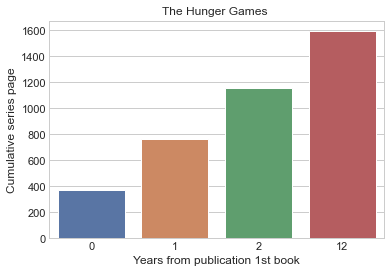

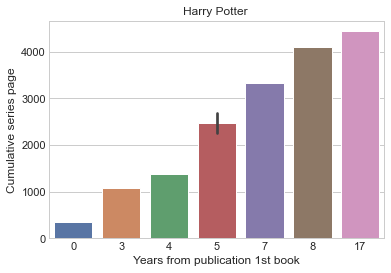

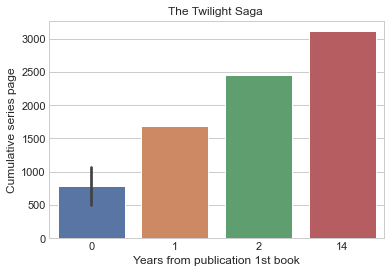

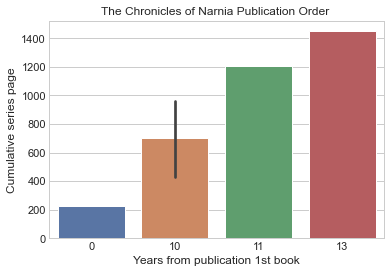

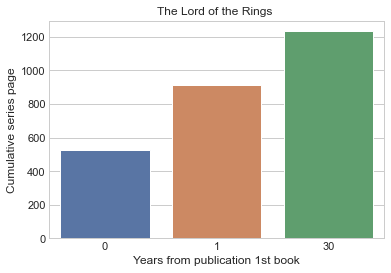

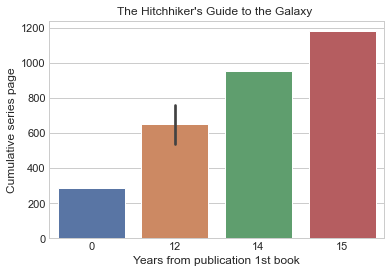

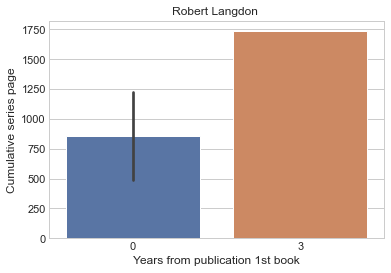

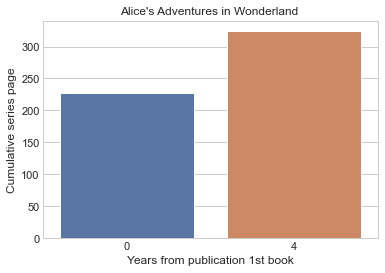

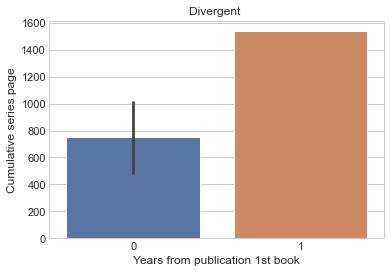

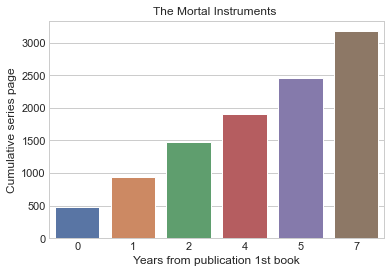

In [15]:
fun.plot_dictionary(dictionary)

## 5) Algorithmic Question

For this exercise, we chose to not rely on an external functions file, as we felt that the code we wrote was an essential part of the assignment and the answers would be lacking without showing it in full.

### Answer 5.1

We created a recursive program which, given a string, determines the length of its longest subsequence that is still in alphabetical order. Our program is composed of two functions: the first calculates the maximum length for each set of subsequences considered at the variation of the last letter, while the second returns the absolute maximum. 

For the first function we have initially defined a variable n equal to the length of the string and a variable "max_end". This variable is updated for each cluster of substrings, to define the max length of each. We then defined the recursive function in a for loop with range equal to n. For each index we computed the recursive function considering the strings that start from the first letter up until the i-th one. 

Now, for each instance we save the result with the variable "partial". In those cases when the letter in position i-1 comes first in alphabetical order with respect to the letter in position n-1 and at the same time the value "partial" +1 is greater than max_end, then we update max_end as partial+1. 

In the second function, we set the initial max_value as 1 and then apply the previous function to calculate the final absolute max value, which is then returned.

In [121]:
def substring_ending(string):
    global max_value
    n = len(string)
    max_end=1
    for i in range(1,n):
        partial =substring_ending(string[:i])
        if string[i-1] < string[n-1] and partial + 1 > max_end:
            max_end = partial + 1
        if max_end > max_value:
            max_value = max_end
    return max_end

def longest_substring(string):
    global max_value
    max_value = 1
    substring_ending(string)
    return max_value
                            

In [122]:
substring_ending("zabch")

4

In [123]:
longest_substring("lmabcnofgqrhi")

7

In [128]:
longest_substring("moabloc")

4

This algorithm's running time is exponential, equal to 2<sup>n</sup> (this will be shown in the next point). For this reason, when increasing the length of the string even of one single unit, the time needed to obtain the max length substring will double. Considering the string "CADFECEILGJHABNOPSTIRYOEABILCNR" we get a running time of 2<sup>31</sup>, therefore the algorithm will not compute within a reasonable time.

### Answer 5.2

We now want to prove that the running time of this algorithm is exponential. We know that it uses a recursive function to determine the lenght of the longest substring which is still in alphabetical order. So, for a given string of length "n", we can generalise our function as f(n). 

For the recurrence, we can now define f(n) = f(n-1) + f(n-2) + f(n-3) + ... + f(1)
Consequently, we can define f(n-1) =f(n-2) + f(n-3) + ... + f(1)

Working on these two equations we can simplify as follows:

f(n) = f(n-1) + f(n-2) + f(n-3) + ... + f(1) = (f(n-2) + f(n-2) + f(n-3) + ... + f(1)) + f(n-2) + f(n-3) + ... + f(1) = 2 * f(n-1)

This procedure can be replicated for f(n-1), f(n-2), etc. up until f(1):
f(n) = 2f(n-1) f(n-1) = 2f(n-2) ... f(2) = 2f(1) f(1) = 2f(0)

By combining all these equations together we can write:
f(n) = 2 * f(n-1) = 2 * 2 * f(n-2) = 2 * 2 * 2 * f(n-3) = 2 * 2 * 2 * 2 * f(n-4) = ..... = (2<sup>n</sup> - 1) * f(1) = (2<sup>n</sup>) * f(0) = O( 2<sup>n</sup> )

Therefore, we have proved that the recursive function has an exponential running time, as previously stated.

### Answer 5.3

The program we created by using dynamic programming takes a string and associates it to a list containing for each letter of the string an initial value equal to 1. To update these values, we compare letter by letter each letter of the string, to check which one comes first in alphabetical order. If the letter in position j-th (with 0<j<i) is "smaller" than the letter in position i, we check the value associated to those letters in the "match" list. If the value of the list in position i is "smaller" than the value of the list in position j+1, we will update the value of the i-th list to the value of the list in position j+1. When the letter in position j is instead bigger than position i, then we go on without changing anything. Once the for loop is completed, we will have obtained a new "match" list, which contains for each i-th letter the length of the max substring which can be obtained by starting from the beginning of the string until the i-th position, skipping the letters greater than the letter in position i.

At this point, to determine the length of the longest substring in alphabetical order we simply have to find the value in the "match" list.

In [125]:
def longestSubstring(string):
    match=[]
    for i in range(len(string)):
        match.append(1)
    for i in range(0, len(string)):
        for j in range(0,i):
            if string[j] < string[i]:
                if match[i] < match[j] +1:
                    match[i] = match[j] +1
    max_value = max(match)
    return max_value
 

In [126]:
longestSubstring("CADFECEILGJHABNOPSTIRYOEABILCNR.")

11

### Answer 5.4

The time complexity for the program defined in the question 5.3 is equal to O(n<sup>2</sup>). This can be easily shown by analyzing the  function: there are two linear operations, a single for loop  with one operation in it and a nested for loop with 3 operations in it. Thus, we get a time complexity equal to:

 Time Complexity = 3n<sup>2</sup>+ n + 2 = O(n<sup>2</sup>)
 
In this time complexity we can drop the costant element and also the element with 1°grade. Consequently, the time complexity is asymptotic to n<sup>2</sup>.